# Improving Neural Network Performance

1. Vanishing Gradients
    - Activation functions
    - Weight initialization

2. Overfitting
    - Reduce Complexity/Increase Data
    - Dropout Layers
    - Regularization(L! & L2)

3. Normalization
    - Normalizing inputs
    - Batch Normalization
    - Normalizing Activations

4. Gradient Checking and Clipping

5. Optimizers -
    - Momentum
    - Adagrad
    - RMSprop
    - Adam

6. Learning rate scheduling

7. Hyperparameter Tuning
    - No. of hidden layers
    - nodes/layer
    - Batch size


# 1. Early stopping

**Early stopping** is a regularization technique used to prevent overfitting in machine learning models, particularly neural networks, by monitoring the model’s performance on validation data and stopping the training process when the model starts to overfit.



## How Early Stopping Works
1. **Training and Validation Loss Tracking**: During training, both the training loss (error on the training dataset) and validation loss (error on a separate validation dataset) are monitored at each epoch.

2. **Detecting Overfitting**:
Initially, both training and validation losses typically decrease as the model learns the general patterns in the data.
At some point, the training loss might continue to decrease while the validation loss starts to increase. This increase in validation loss indicates that the model is starting to "memorize" or overfit the training data, rather than learning useful patterns that generalize well to unseen data.

3. **Stopping Condition**: Early stopping monitors the validation loss and stops training when the validation loss does not improve after a certain number of epochs (referred to as the patience parameter). This is the point where the model is considered to have reached its optimal generalization ability.

4. **Restoring Best Weights**: To ensure that the model doesn’t use parameters from an overfitted epoch, early stopping can restore the model weights from the epoch with the best (lowest) validation loss.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_classification
import seaborn as sns

2024-11-13 01:30:21.712541: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 01:30:24.486677: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X, y = make_classification(
    n_samples= 250,
    n_features=2,        # Only two features
    n_informative=2,     # Both features are informative
    n_redundant=0,       # No redundant features
    n_clusters_per_class=1,  # Single cluster per class
    class_sep=1.0,       # Slight separation to make classification harder
    flip_y=0.1,          # 10% label noise to make the problem more challenging
    random_state=42
)

<Axes: >

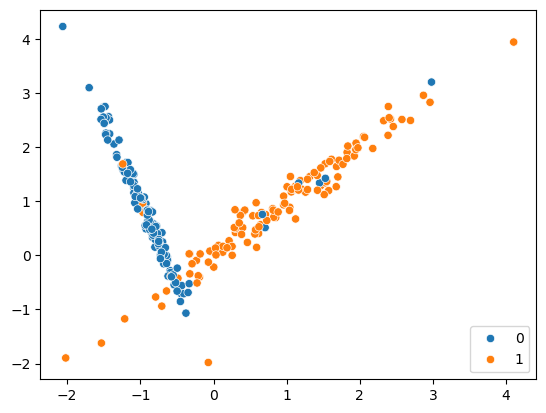

In [4]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X, y, validation_split=0.2, epochs=1000, verbose=0)

2024-11-13 01:31:31.522934: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x779714ff1230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-13 01:31:31.522990: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX230, Compute Capability 6.1
2024-11-13 01:31:32.096822: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-13 01:31:32.711129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-11-13 01:31:34.332752: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


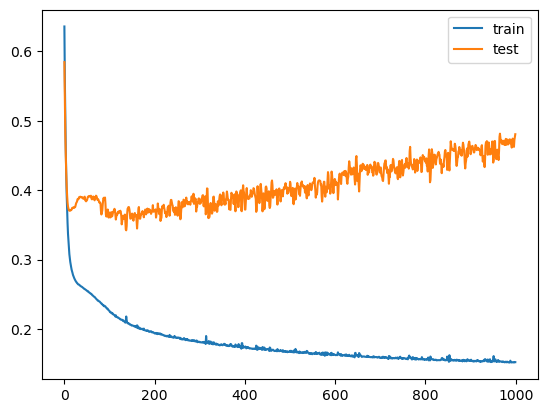

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 10s 1ms/step


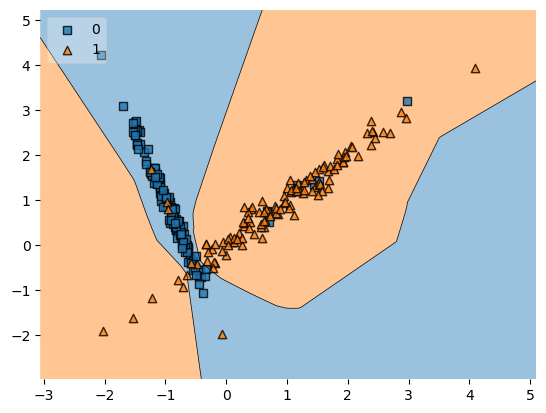

In [9]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [20]:
model2 = Sequential()

model2.add(Dense(256, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [21]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


1. **monitor**: 	Quantity to be monitored. Defaults to "val_loss".<br>
2. **min_delta**:	Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.<br>
3. **patience**:	Number of epochs with no improvement after which training will be stopped. Defaults to 0.<br>
4. **verbose**:	Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.<br>
5. **mode**:	One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".<br>
6. **baseline**:	Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.
7. **restore_best_weights**:	Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set. Defaults to False.
8. **start_from_epoch**:	Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped. Defaults to 0.

In [19]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [22]:
history2 = model2.fit(X, y, validation_split=0.2, epochs=3500, callbacks=callback)

Epoch 1/3500
7/7 [==============================] - 1s 28ms/step - loss: 0.6642 - accuracy: 0.7850 - val_loss: 0.6237 - val_accuracy: 0.8600
Epoch 2/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.5968 - accuracy: 0.8850 - val_loss: 0.5671 - val_accuracy: 0.8600
Epoch 3/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.5400 - accuracy: 0.8850 - val_loss: 0.5216 - val_accuracy: 0.8600
Epoch 4/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.4920 - accuracy: 0.8900 - val_loss: 0.4825 - val_accuracy: 0.8600
Epoch 5/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.4512 - accuracy: 0.8900 - val_loss: 0.4526 - val_accuracy: 0.8600
Epoch 6/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.4189 - accuracy: 0.8900 - val_loss: 0.4283 - val_accuracy: 0.8600
Epoch 7/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.3906 - accuracy: 0.8900 - val_loss: 0.4105 - val_accuracy: 0.8600
Epoch 8/3500
7/7 [=

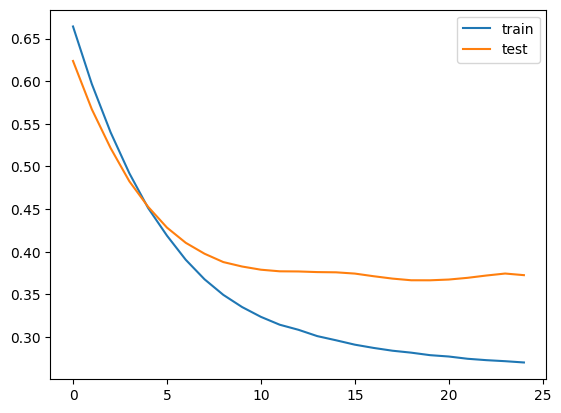

In [23]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


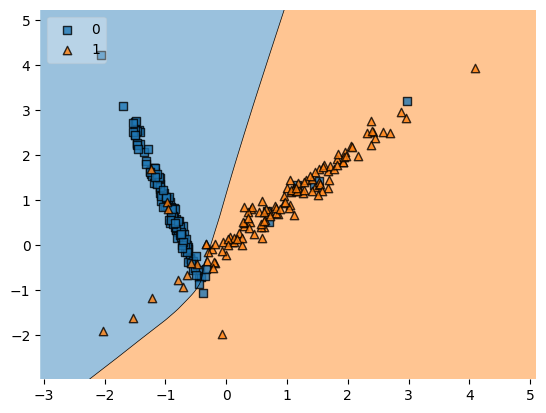

In [25]:
plot_decision_regions(X, y.ravel(), clf = model2, legend=2)
plt.show()

# 2. Feature Scaling in Deep Learning


### **Why Feature Scaling in Deep Learning?**

1. **Improves Convergence Speed**:
   - Deep learning algorithms, especially gradient-based optimizers (e.g., SGD, Adam), converge faster when the features are scaled. This is because the optimization landscape becomes smoother and less erratic when the features are on a similar scale.
   
   - Example: Imagine optimizing a function where one feature spans [0, 1] and another spans [0, 1000]. The gradient steps will favor the larger feature, leading to erratic and slower convergence. Scaling brings all features to similar ranges, stabilizing optimization.

2. **Prevents Dominance of Large-Scale Features**:
   - Features with larger magnitudes can disproportionately influence the loss function and gradient updates, leading to suboptimal model performance.

   - Example: A dataset with age (0–100) and salary (10k–1M). Without scaling, the network will prioritize learning patterns from salary because of its larger magnitude, neglecting age.

3. **Enables Effective Learning in Neural Networks**:
   - Neural networks are sensitive to input scale due to weight initialization and activation functions. Properly scaled inputs ensure that activations are not excessively large or small, which prevents issues like vanishing or exploding gradients.

4. **Compatibility with Regularization**:
   - Regularization techniques like L1 or L2 penalties assume that all features contribute equally to the prediction. Unscaled features can bias these penalties.

5. **Effective Weight Initialization**:
   - Scaling inputs helps ensure weights initialized with common strategies (e.g., Xavier, He) lead to balanced signal propagation in the network.


### **Why is it so important?**

- **Gradient Descent Dynamics**:
  - When features are unscaled, the gradients for weights corresponding to large-magnitude features can dominate, causing oscillations or slow convergence.

- **Activation Function Behavior**:
  - Common activation functions (e.g., ReLU, sigmoid, tanh) perform best when inputs are within a specific range. Without scaling, inputs may saturate the function, reducing its ability to learn effectively.

  - Example: If inputs are very large, the sigmoid function saturates to values near 0 or 1, leading to near-zero gradients (vanishing gradients).

- **Batch Normalization Dependency**:
  - Batch Normalization, which normalizes intermediate activations, benefits from scaled inputs to ensure the normalization process operates effectively.

  - Example: Suppose one feature has a range of [0, 1000], and another has a range of [-1, 1]. Even though BN adjusts intermediate outputs, the large magnitude of the first feature can still lead to imbalanced gradients or instability in deeper layers.


### **What if I do not scale features?**

1. **Slow or No Convergence**:
   - The optimization process may take much longer or fail to converge altogether due to erratic gradients.

  - Example: Training an image classifier where pixel values are unscaled ([0, 255]) can lead to erratic loss curves. Scaling pixels to [0, 1] smoothens loss gradients and speeds up convergence.

2. **Suboptimal Model Performance**:
   - The model may overfit or underfit, as the relative contribution of features becomes imbalanced.

   - Example: Predicting house prices with unscaled features (e.g., house_size in [0, 5000] and bedrooms in [0, 10]) may lead to the model ignoring bedrooms since its numerical range is much smaller.


3. **Numerical Instability**:
   - In some cases, especially with deep networks, unscaled features can lead to numerical instability during training, resulting in NaN losses.

   - Example: If inputs range from [1, 10<sup>6</sup>], intermediate activations or gradients can overflow the range of floating-point representation, causing NaN or Inf errors during training.


### **Why do scaled features work?**

1. **Improved Gradient Flow**:
   - Scaled features lead to gradients of similar magnitudes for all parameters, promoting stable and efficient updates.

   -  Example; Suppose the loss surface is like a steep valley due to unscaled features. Gradient descent struggles to navigate the steep walls. Scaling flattens the valley, enabling smoother descent.

2. **Better Weight Initialization**:
   - Weight initialization schemes (e.g., Xavier, He initialization) assume that inputs are normalized, enabling balanced propagation of signals through the network.

3. **Balanced Feature Contribution**:
   - Scaling ensures that no single feature disproportionately impacts the model, leading to better generalization.

   - Example: In a dataset with features like age, income, and savings, scaling ensures all contribute equally to the prediction, avoiding bias towards large-range features like income.




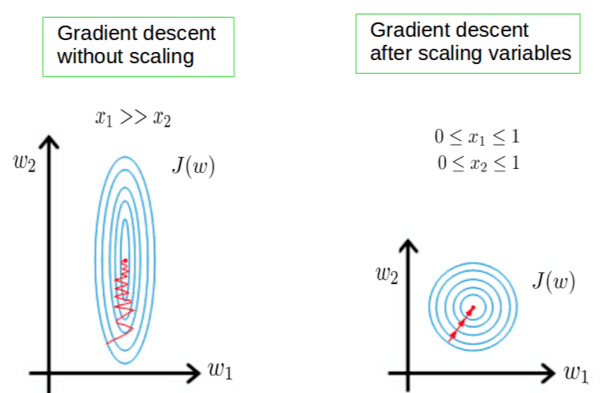

### **Methods to Scale Features**

1. **Standardization (Z-Score Normalization)**:
   - Formula: $ z = \frac{x - \mu}{\sigma} $
   - Centers features at zero with a standard deviation of one.
   - Useful for algorithms sensitive to mean and variance, like gradient-based methods.

2. **Min-Max Scaling**:
   - Formula: $ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $
   - Scales features to a fixed range, often [0, 1].
   - Common for inputs to neural networks.

3. **Normalization (L2 Norm)**:
   - Formula: $ x' = \frac{x}{||x||_2} $
   - Scales feature vectors to unit norm.
   - Often used in applications like text embeddings.

4. **Log Transformation**:
   - Formula: $ x' = \log(x + \epsilon) $
   - Reduces the impact of large values and compresses dynamic range.

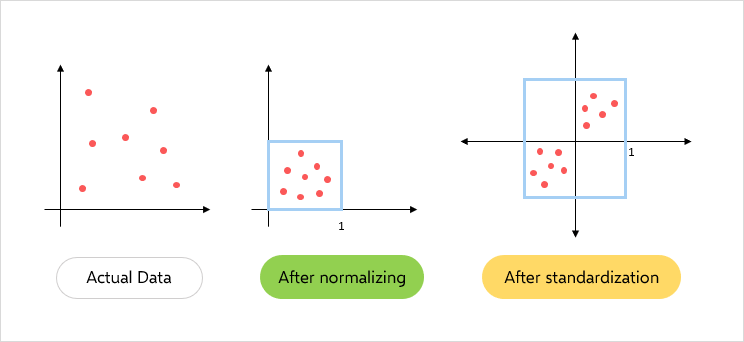

**Standardization**: Scales features to have a mean of 0 and a standard deviation of 1.<br>
**Normalization**: Rescales features to fit within a specific range, often [0, 1].

<h3>When to Standardize vs Normalize?</h3>

<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th>Criteria</th>
      <th>Standardization</th>
      <th>Normalization</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>Data Distribution</b></td>
      <td>Use when data follows a normal (Gaussian) distribution.</td>
      <td>Use when data does <b>not</b> follow a normal distribution.</td>
    </tr>
    <tr>
      <td><b>Model Type</b></td>
      <td>Algorithms like SVMs, PCA, linear regression, or neural networks often benefit from standardization.</td>
      <td>Neural networks (e.g., with sigmoid or ReLU activations) often require normalized data in [0, 1].</td>
    </tr>
    <tr>
      <td><b>Feature Range</b></td>
      <td>Doesn't restrict data to a fixed range; values can be negative or positive.</td>
      <td>Scales data to a fixed range (e.g., [0, 1] or [-1, 1]).</td>
    </tr>
    <tr>
      <td><b>When Feature Units Differ?</b></td>
      <td>Ideal for datasets with varying units (e.g., age in years vs salary in dollars).</td>
      <td>Use when all features already have similar units but need rescaling.</td>
    </tr>
    <tr>
      <td><b>Presence of Outliers</b></td>
      <td>Less sensitive to outliers as it uses mean and standard deviation.</td>
      <td>More sensitive to outliers since extreme values dominate min/max calculations.</td>
    </tr>
    <tr>
      <td><b>Examples</b></td>
      <td>
        Predicting house prices where features include:
        <ul>
          <li><b>House size (sq ft)</b> in [500, 5000]</li>
          <li><b>Number of bedrooms</b> in [1, 5]</li>
          <li><b>Age of house (years)</b> in [0, 100]</li>
        </ul>
        These features have different units and ranges. Standardizing makes them comparable for models like linear regression, PCA, or SVM.
      </td>
      <td>
        Image data:
        <ul>
          <li>Pixel intensities range from [0, 255].</li>
          <li>Normalizing to [0, 1] ensures inputs are suitable for neural networks, especially when using sigmoid or ReLU activations.</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/refs/heads/master/Social_Network_Ads.csv")
df = df.iloc[:, 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
338,38,55000,0
310,42,70000,0
296,42,73000,1
374,37,80000,0
181,31,71000,0


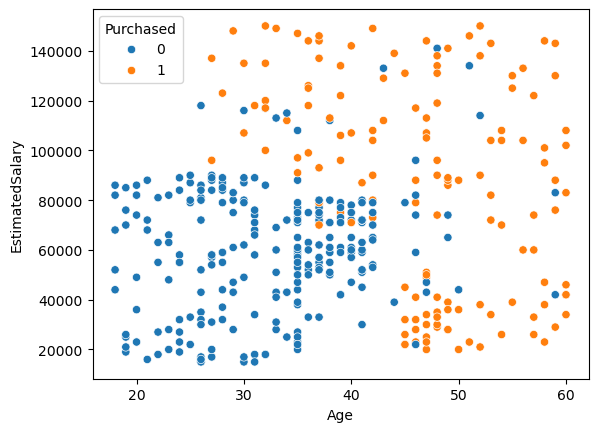

In [12]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)
plt.show()

In [31]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [37]:
# creating a neural network model without scaling
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model3 = Sequential()
model3.add(Dense(128, input_dim=2, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history3 = model3.fit(x=x, y=y, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 8316.9814 - accuracy: 0.2875 - val_loss: 2756.0464 - val_accuracy: 0.6375
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 2389.6941 - accuracy: 0.3625 - val_loss: 975.6075 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1393.7483 - accuracy: 0.7125 - val_loss: 2346.4897 - val_accuracy: 0.3625
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 790.3481 - accuracy: 0.7125 - val_loss: 171.5896 - val_accuracy: 0.6375
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 470.6014 - accuracy: 0.3375 - val_loss: 417.1412 - val_accuracy: 0.3625
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 308.9652 - accuracy: 0.7125 - val_loss: 103.4521 - val_accuracy: 0.6375
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 252.2298 - accuracy: 0.4375 - val_loss: 370.9018 - 

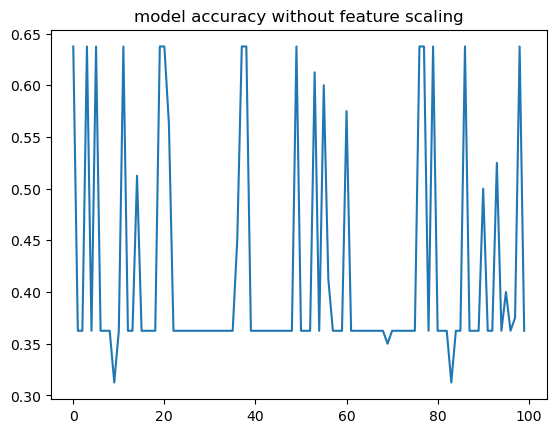

In [42]:
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy without feature scaling')
plt.show()

accuracy is oscillating around 0.35 to 0.65 but not converging.

In [44]:
# scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [48]:
# creating a network

model4 = Sequential()
model4.add(Dense(128, input_dim=2, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
history4 = model4.fit(x_scaled, y, validation_split=0.2, epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.7108 - accuracy: 0.4187 - val_loss: 0.6814 - val_accuracy: 0.5875
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6384 - accuracy: 0.8219 - val_loss: 0.6584 - val_accuracy: 0.6375
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5804 - accuracy: 0.8469 - val_loss: 0.6391 - val_accuracy: 0.6625
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5306 - accuracy: 0.8500 - val_loss: 0.6157 - val_accuracy: 0.7000
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4902 - accuracy: 0.8531 - val_loss: 0.5969 - val_accuracy: 0.7125
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4562 - accuracy: 0.8562 - val_loss: 0.5795 - val_accuracy: 0.7125
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4274 - accuracy: 0.8594 - val_loss: 0.5682 - val_accuracy: 0.7125
Epoch 8/100


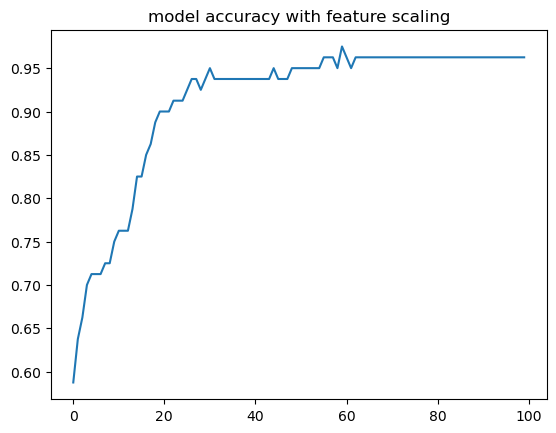

In [50]:
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy with feature scaling')
plt.show()